In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from __future__ import print_function



In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,ecg,spo2,Sleep Disorder
0,1,27,6.1,6,42,6,2,77,4200,72,95,Normal
1,1,28,6.2,6,60,8,0,75,10000,63,95,Normal
2,1,28,6.2,6,60,8,0,75,10000,70,95,Normal
3,1,28,5.9,4,30,8,1,85,3000,98,93,Sleep Apnea
4,1,28,5.9,4,30,8,1,85,3000,69,85,Sleep Apnea


In [4]:
df.tail()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,ecg,spo2,Sleep Disorder
1491,0,59,8.1,9,75,3,2,68,7000,86,86,Sleep Apnea
1492,0,59,8.0,9,75,3,2,68,7000,94,89,Sleep Apnea
1493,0,59,8.1,9,75,3,2,68,7000,77,91,Sleep Apnea
1494,0,59,8.1,9,75,3,2,68,7000,83,89,Sleep Apnea
1495,0,59,8.1,9,75,3,2,68,7000,98,92,Sleep Apnea


In [5]:
df.shape

(1496, 12)

In [6]:
df.size

17952

In [7]:
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'ecg', 'spo2', 'Sleep Disorder'],
      dtype='object')

In [8]:
df['Sleep Disorder'].unique()

array(['Normal', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [9]:
df.dtypes

Gender                       int64
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int64
Heart Rate                   int64
Daily Steps                  int64
ecg                          int64
spo2                         int64
Sleep Disorder              object
dtype: object

In [10]:
df['Sleep Disorder'].value_counts()

Normal         876
Sleep Apnea    312
Insomnia       308
Name: Sleep Disorder, dtype: int64

<AxesSubplot:>

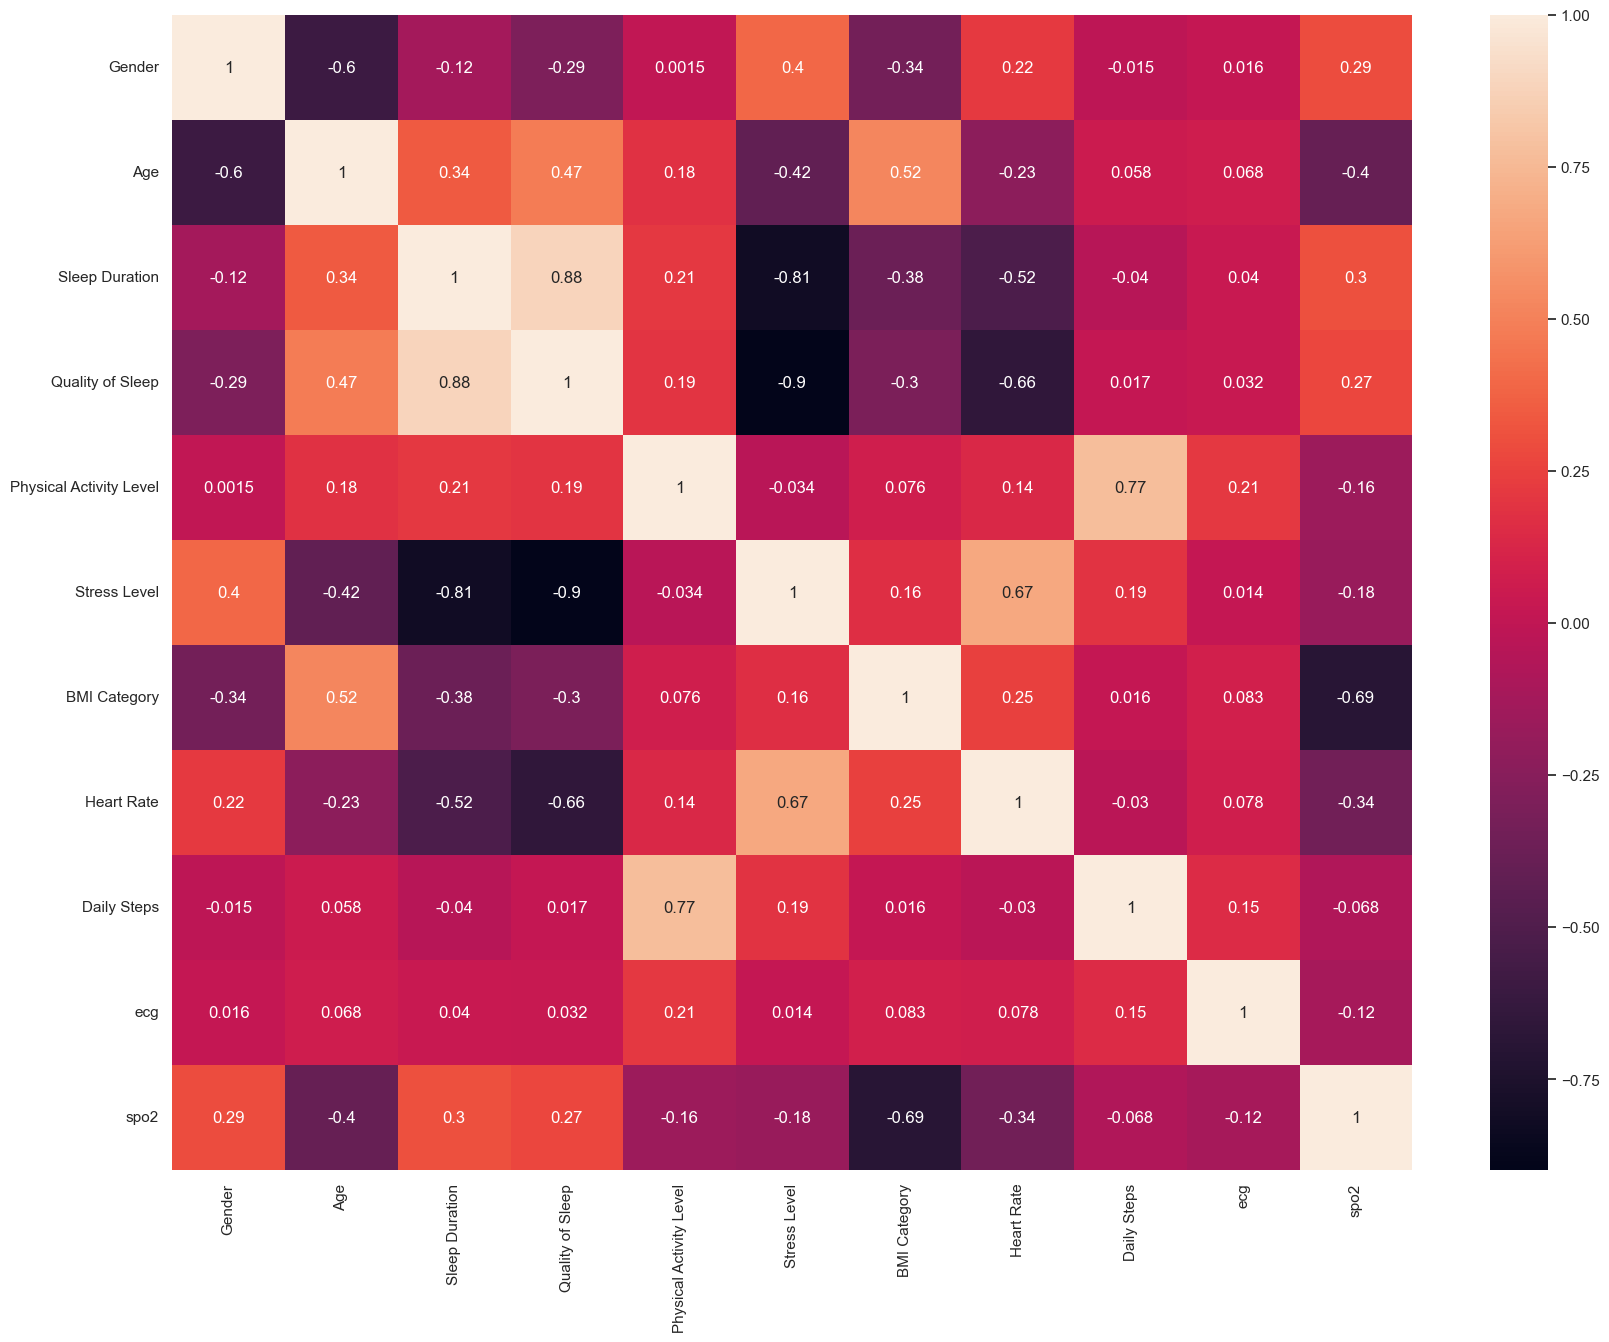

In [11]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [12]:
features = df[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'ecg', 'spo2']]
target = df['Sleep Disorder']


In [13]:
# Convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)

In [14]:
# Split into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=0.2, random_state=2)

In [15]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [16]:
# Build ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
model = Sequential()
model.add(Dense(64, input_dim=Xtrain.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(target)), activation='softmax'))  # Output layer

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,947
Trainable params: 2,947
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Epoch 1/100
38/38 [==============================] - 2s 13ms/step - loss: 0.7694 - accuracy: 0.7316 - val_loss: 0.5082 - val_accuracy: 0.8900
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.4307 - accuracy: 0.8662 - val_loss: 0.3298 - val_accuracy: 0.8967
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.9097 - val_loss: 0.2604 - val_accuracy: 0.9167
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2316 - accuracy: 0.9231 - val_loss: 0.2118 - val_accuracy: 0.9367
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1985 - accuracy: 0.9348 - val_loss: 0.1882 - val_accuracy: 0.9400
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1701 - accuracy: 0.9465 - val_loss: 0.1718 - val_accuracy: 0.9467
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1503 - accuracy: 0.9498 - val_loss: 0.1510 - val_accuracy: 0.9533
Epoch 8/100


Epoch 59/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 0.9950 - val_loss: 0.0397 - val_accuracy: 0.9900
Epoch 60/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9975 - val_loss: 0.0366 - val_accuracy: 0.9900
Epoch 61/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0310 - val_accuracy: 0.9900
Epoch 62/100
38/38 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 63/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0291 - val_accuracy: 0.9900
Epoch 64/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.9975 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 65/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.0285 - val_accuracy: 0.9900
Epoch 

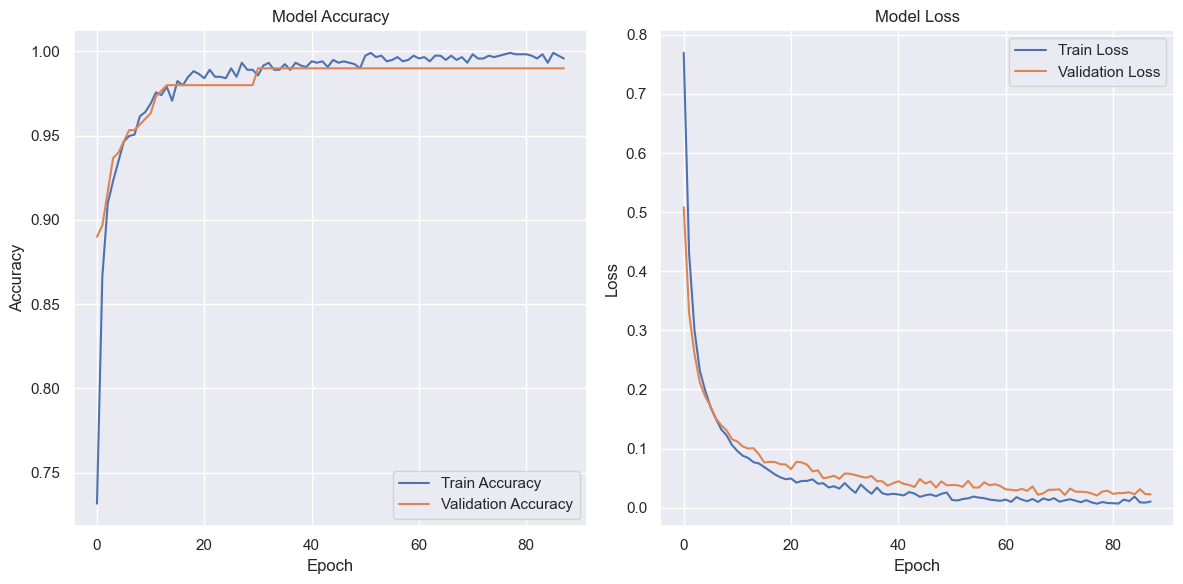

In [23]:


# Convert categorical target to numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Split into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target_encoded, test_size=0.2, random_state=2)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Build ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(64, input_dim=Xtrain.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(le.classes_), activation='softmax'))  # Output layer

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(Xtrain, Ytrain, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(Xtest, Ytest),
                    callbacks=[early_stop],
                    verbose=1)



In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(Xtest, Ytest)
print(f"ANN Test Accuracy: {accuracy*100:.2f}%")

10/10 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9900
ANN Test Accuracy: 99.00%


In [25]:
# Make predictions
y_pred = np.argmax(model.predict(Xtest), axis=1)
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        66
           1       1.00      1.00      1.00       174
           2       0.95      1.00      0.98        60

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



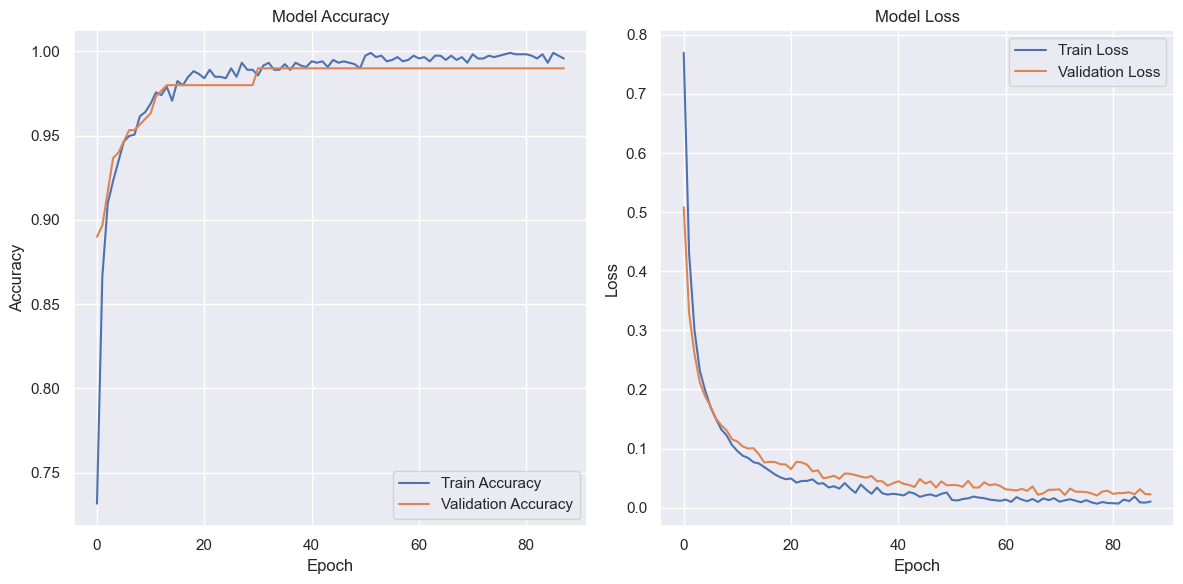

In [26]:
# Plot training history
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Save the model
model.save('ANN_model.h5')

# Save the scaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))


In [28]:
# Make sample predictions
def predict_sample(sample_data):
    sample_data = np.array(sample_data).reshape(1, -1)
    sample_data = scaler.transform(sample_data)
    prediction = model.predict(sample_data)
    predicted_class = np.argmax(prediction)
    return le.inverse_transform([predicted_class])[0]

# Test predictions
print(predict_sample([[1,28,5.9,4,30,8,1,85,3000,98,93]]))  # Sample 1
print(predict_sample([[1,28,5.9,4,30,8,1,85,3000,57,92]]))  # Sample 2
print(predict_sample([[1,30,7.6,7,75,6,0,70,8000,63,98]]))  # Sample 3

Sleep Apnea
Insomnia
Normal


# TEST

In [29]:
# predict_sleep_disorder.py
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import pickle

def predict_sleep_disorder(input_data):
    """
    Predicts sleep disorder using the trained ANN model
    
    Args:
        input_data (list): List of feature values in this order:
            [Gender, Age, Sleep Duration, Quality of Sleep,
            Physical Activity Level, Stress Level, BMI Category, 
            Heart Rate, Daily Steps, ecg, spo2]
            
    Returns:
        str: Predicted sleep disorder
    """
    # Load the saved model and preprocessing objects
    model = load_model('ANN_model.h5')
    scaler = pickle.load(open('scaler.pkl', 'rb'))
    le = pickle.load(open('label_encoder.pkl', 'rb'))
    
    # Convert input to numpy array and reshape
    sample_data = np.array(input_data).reshape(1, -1)
    
    # Scale the features
    sample_data = scaler.transform(sample_data)
    
    # Make prediction
    prediction = model.predict(sample_data)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Decode the prediction
    predicted_disorder = le.inverse_transform(predicted_class)[0]
    
    # Get prediction probabilities
    probabilities = prediction[0]
    class_probabilities = {le.inverse_transform([i])[0]: float(probabilities[i]) 
                          for i in range(len(probabilities))}
    
    return {
        'predicted_disorder': predicted_disorder,
        'probabilities': class_probabilities
    }

if __name__ == "__main__":
    # Sample input data
    sample_input = [1, 30, 7.6, 7, 75, 6, 0, 70, 8000, 63, 98]
    
    # Make prediction
    result = predict_sleep_disorder(sample_input)
    
    # Print results
    print("\nSleep Disorder Prediction Results")
    print("="*40)
    print(f"Input Features: {sample_input}")
    print(f"\nPredicted Sleep Disorder: {result['predicted_disorder']}")
    print("\nPrediction Probabilities:")
    for disorder, prob in result['probabilities'].items():
        print(f"{disorder}: {prob:.4f}")


Sleep Disorder Prediction Results
Input Features: [1, 30, 7.6, 7, 75, 6, 0, 70, 8000, 63, 98]

Predicted Sleep Disorder: Normal

Prediction Probabilities:
Insomnia: 0.0000
Normal: 1.0000
Sleep Apnea: 0.0000


Epoch 1/100
38/38 [==============================] - 2s 9ms/step - loss: 0.7777 - accuracy: 0.7249 - val_loss: 0.4513 - val_accuracy: 0.9300
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.3913 - accuracy: 0.9038 - val_loss: 0.2881 - val_accuracy: 0.9133
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.9247 - val_loss: 0.2347 - val_accuracy: 0.9333
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9306 - val_loss: 0.1936 - val_accuracy: 0.9467
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 0.9323 - val_loss: 0.1728 - val_accuracy: 0.9467
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1725 - accuracy: 0.9473 - val_loss: 0.1562 - val_accuracy: 0.9467
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.1490 - accuracy: 0.9507 - val_loss: 0.1451 - val_accuracy: 0.9500
Epoch 8/100
3

10/10 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9900

ANN Test Accuracy: 99.00%

Classification Report:
              precision    recall  f1-score   support

    Insomnia       1.00      0.95      0.98        66
      Normal       1.00      1.00      1.00       174
 Sleep Apnea       0.95      1.00      0.98        60

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



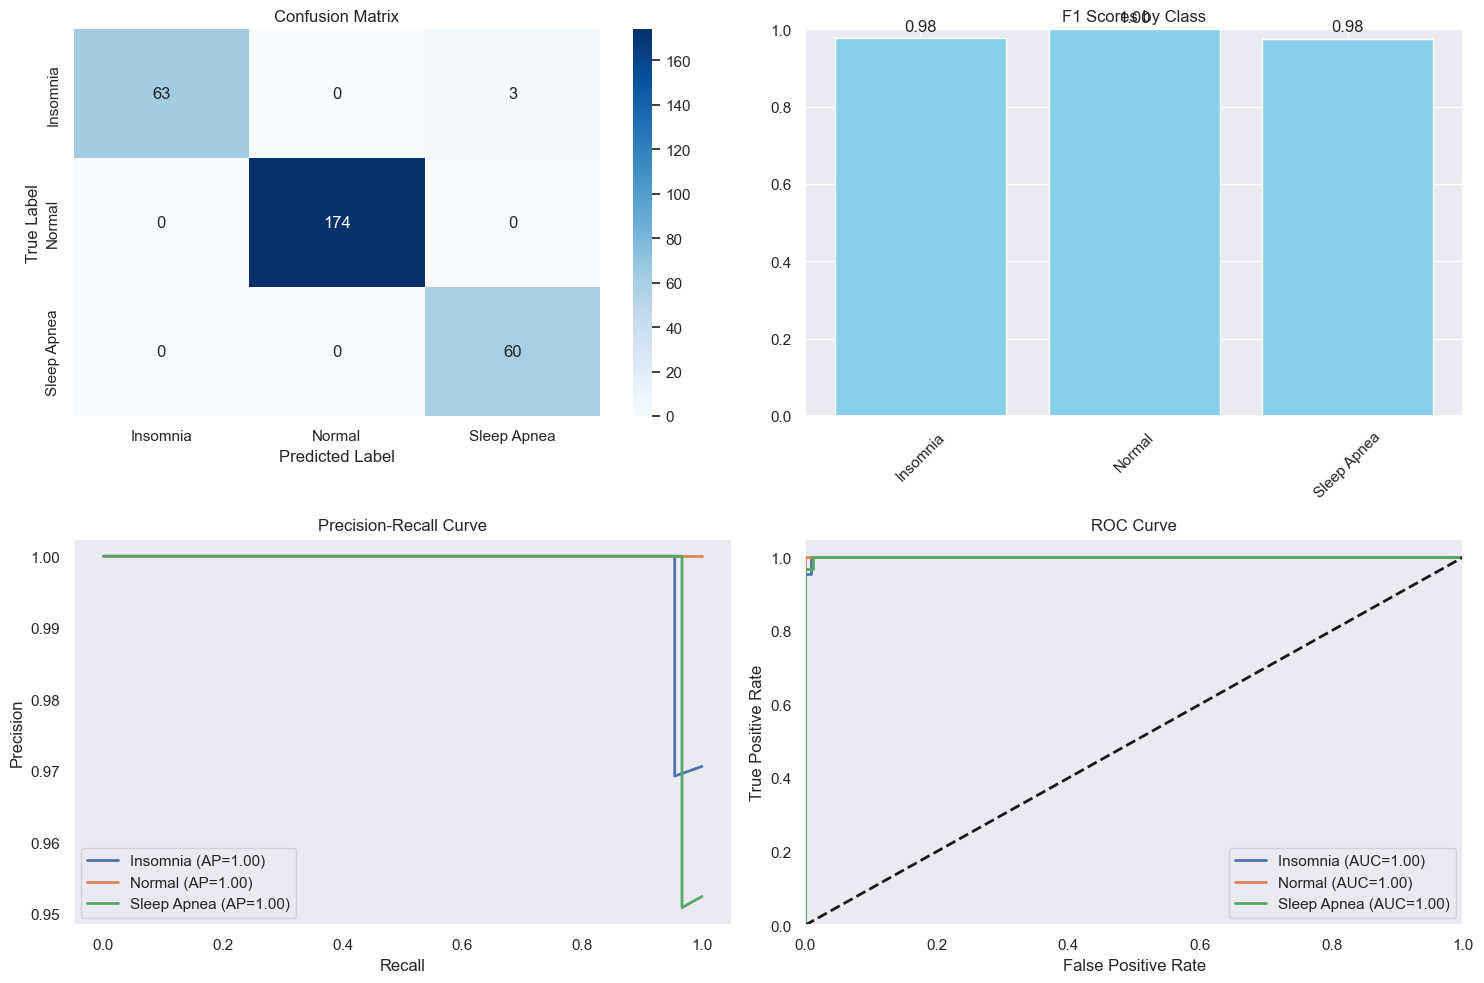

In [30]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report, confusion_matrix, 
                            precision_recall_curve, roc_curve, auc,
                            f1_score, precision_score, recall_score)
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("data.csv")

# Prepare features and target
features = df[['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'ecg', 'spo2']]
target = df['Sleep Disorder']

# Convert categorical target to numerical labels
le = LabelEncoder()
target_encoded = le.fit_transform(target)
class_names = le.classes_
n_classes = len(class_names)

# Split into train and test data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target_encoded, 
                                               test_size=0.2, random_state=2)

# Scale the features
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=Xtrain.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(Xtrain, Ytrain, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(Xtest, Ytest),
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(Xtest, Ytest)
print(f"\nANN Test Accuracy: {accuracy*100:.2f}%")

# Make predictions
y_pred_proba = model.predict(Xtest)
y_pred = np.argmax(y_pred_proba, axis=1)
y_test_labels = le.inverse_transform(Ytest)
y_pred_labels = le.inverse_transform(y_pred)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=class_names))

# ====================== VISUALIZATIONS ======================

plt.figure(figsize=(15, 10))

# 1. Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_names)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 2. F1 Scores per Class
plt.subplot(2, 2, 2)
f1_scores = f1_score(Ytest, y_pred, average=None)
plt.bar(range(n_classes), f1_scores, color='skyblue')
plt.xticks(range(n_classes), class_names, rotation=45)
plt.title('F1 Scores by Class')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

# 3. Precision-Recall Curve (for multiclass)
plt.subplot(2, 2, 3)
# Binarize the output for multiclass
y_test_bin = label_binarize(Ytest, classes=range(n_classes))
precision = dict()
recall = dict()
thresholds = dict()

for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(
        y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall[i], precision[i], lw=2, 
             label=f'{class_names[i]} (AP={auc(recall[i], precision[i]):0.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()

# 4. ROC Curve (for multiclass)
plt.subplot(2, 2, 4)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, 
             label=f'{class_names[i]} (AUC={roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()

plt.tight_layout()
plt.show()

# ====================== SAVE MODEL ======================
model.save('ANN_model.h5')

import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))

In [31]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=class_names)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.close()

In [32]:
plt.figure(figsize=(8, 6))
f1_scores = f1_score(Ytest, y_pred, average=None)
plt.bar(range(n_classes), f1_scores, color='skyblue')
plt.xticks(range(n_classes), class_names, rotation=45)
plt.title('F1 Scores by Class')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.savefig('f1_scores.png', dpi=300, bbox_inches='tight')
plt.close()

In [33]:
plt.figure(figsize=(8, 6))
y_test_bin = label_binarize(Ytest, classes=range(n_classes))
precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(
        y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall[i], precision[i], lw=2, 
             label=f'{class_names[i]} (AP={auc(recall[i], precision[i]):0.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.savefig('precision_recall_curve.png', dpi=300, bbox_inches='tight')
plt.close()

In [34]:
plt.figure(figsize=(8, 6))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, 
             label=f'{class_names[i]} (AUC={roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.close()